In [1]:
import seaborn as sns
import scipy
import numpy as np
import pandas as pd
import pickle
import warnings

from pyod.models.lof import LOF
from sklearn.cluster import DBSCAN
from pyod.models.cof import COF

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
warnings.filterwarnings("ignore")

from sklearn.ensemble import IsolationForest
import tensorflow as tf
random_state = 2

In [2]:
df = pd.read_csv("data.csv")
print('Null values present in the dataset : {} '.format(df.isnull().values.any()))
print('Duplicated values present in the data : {}'.format(df.duplicated().sum()))
df.head(5)

Null values present in the dataset : False 
Duplicated values present in the data : 0


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

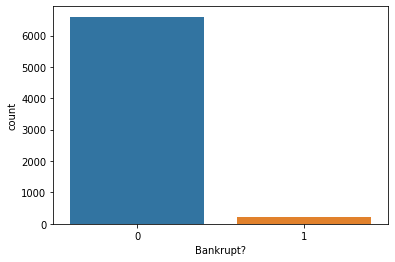

In [5]:
sns.countplot(df['Bankrupt?'])

In [6]:
model = DBSCAN(eps = 0.4, min_samples = 10).fit(df)
labels = model.labels_
labels_df =  pd.DataFrame(labels, columns=['cluster'])
labels_df['cluster'].value_counts()

-1    6776
 0      43
Name: cluster, dtype: int64

DBSCAN has failed to detect any outliers from the dataset 

In [7]:
lof =  LOF()
lof.fit(df)
predict_lof = lof.predict(df)
print('Total number of outliers detected using LOF : {}'.format(np.sum(predict_lof)))
df["LOF"] = predict_lof
df_LOF = df[df.LOF != 1]
df = df.drop("LOF",axis = 1)

Total number of outliers detected using LOF : 627


0    6018
1     174
Name: Bankrupt?, dtype: int64

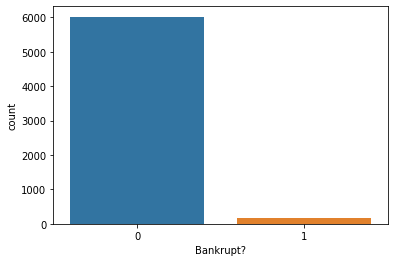

In [8]:
sns.countplot(df_LOF["Bankrupt?"])
df_LOF["Bankrupt?"].value_counts()

627 outliers present in the dataset 

In [9]:
X = df_LOF.iloc[:, 1:].values
y = df_LOF.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=1)
X_train1, y_train1 = SMOTEENN().fit_resample(X_train, y_train)
X_test, y_test = SMOTE().fit_resample(X_test, y_test)
clf = svm.SVC(kernel='rbf')
clf.fit(X_train1, y_train1)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1201
           1       0.74      0.73      0.73      1201

    accuracy                           0.73      2402
   macro avg       0.73      0.73      0.73      2402
weighted avg       0.73      0.73      0.73      2402



In [10]:
cof = COF()
cof.fit(df)
predict_cof = cof.predict(df)
print('Total number of outliers detected using COF : {}'.format(np.sum(predict_cof)))
predict_cof = cof.predict(df)
print("Total number of outliers present in the dataset : {} ".format(np.sum(predict_cof)))
df["COF"] = predict_cof
df_COF = df[df.COF != 1]
df = df.drop("COF",axis = 1)

Total number of outliers detected using COF : 682
Total number of outliers present in the dataset : 682 


In [11]:
X = df_COF.iloc[:, 1:].values
y = df_COF.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=1)
X_train1, y_train1 = SMOTEENN().fit_resample(X_train, y_train)
X_test, y_test = SMOTE().fit_resample(X_test, y_test)
clf = svm.SVC(kernel='rbf')
clf.fit(X_train1, y_train1)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1190
           1       0.73      0.58      0.65      1190

    accuracy                           0.68      2380
   macro avg       0.69      0.68      0.68      2380
weighted avg       0.69      0.68      0.68      2380



In [12]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [13]:
try:
    model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)
    model.fit(df)
    df['scores'] = model.decision_function(df)
    df['anomaly_score'] = model.predict(df)
    print(df[df['anomaly_score']==-1].head())
except:
    model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)
    model.fit(df)
    df['scores'] = model.decision_function(df)
    df['anomaly_score'] = model.predict(df)
    print(df[df['anomaly_score']==-1].head())


   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
2          1                                           0.426071          
3          1                                           0.399844          
5          1                                           0.388680          
6          0                                           0.390923          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
2                                 0.499019   
3                                 0.451265   
5                                 0.415177   
6                                 0.445704   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
2                                           0.472295    
3                                           0.457733    
5                                           0.4191

In [14]:
len(df[df['anomaly_score']==-1])
df_1 = df[df.anomaly_score != -1]
df  = df.drop(['scores'],axis=1)
df  = df.drop(['anomaly_score'],axis=1)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

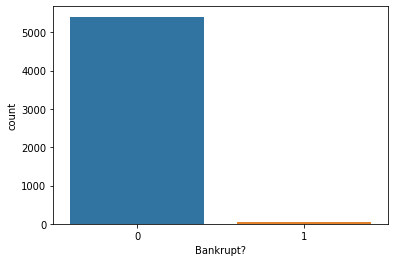

In [15]:
sns.countplot(df_1['Bankrupt?'])

In [16]:
X = df_1.iloc[:, 1:].values
y = df_1.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=1)
X_train1, y_train1 = SMOTEENN().fit_resample(X_train, y_train)
X_test, y_test = SMOTE().fit_resample(X_test, y_test)
clf = svm.SVC(kernel='rbf')
clf.fit(X_train1, y_train1)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1084
           1       0.75      0.70      0.72      1084

    accuracy                           0.73      2168
   macro avg       0.73      0.73      0.73      2168
weighted avg       0.73      0.73      0.73      2168



In [17]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=1)
X_train1, y_train1 = SMOTEENN().fit_resample(X_train, y_train)
X_test, y_test = SMOTE().fit_resample(X_test, y_test)
clf = svm.SVC(kernel='rbf')
clf.fit(X_train1, y_train1)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69      1314
           1       0.70      0.60      0.64      1314

    accuracy                           0.67      2628
   macro avg       0.67      0.67      0.67      2628
weighted avg       0.67      0.67      0.67      2628



IsolationForest gave the  best results for handling outliers 

In [18]:
del df
del df_COF
del df_LOF

In [19]:
X = df_1.iloc[:, 1:].values
y = df_1.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=1)
X_train1, y_train1 = SMOTEENN().fit_resample(X_train, y_train)
X_test, y_test = SMOTE().fit_resample(X_test, y_test)

In [20]:
clf = RandomForestClassifier()
clf.fit(X_train1, y_train1)
print(classification_report(y_test, clf.predict(X_test)))
from sklearn.metrics import accuracy_score
score_rf = accuracy_score(y_test, clf.predict(X_test))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1084
           1       0.99      0.77      0.87      1084

    accuracy                           0.88      2168
   macro avg       0.90      0.88      0.88      2168
weighted avg       0.90      0.88      0.88      2168



In [21]:
clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train1, y_train1)
print(classification_report(y_test, clf1.predict(X_test)))
from sklearn.metrics import accuracy_score
score_gb = accuracy_score(y_test, clf1.predict(X_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1084
           1       0.99      0.91      0.95      1084

    accuracy                           0.95      2168
   macro avg       0.95      0.95      0.95      2168
weighted avg       0.95      0.95      0.95      2168



In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.2)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X_tr,y_tr)
y_predict=kn.predict(X_te)

In [25]:
print(classification_report(y_test, kn.predict(X_test)))
score_kn = accuracy_score(y_test, kn.predict(X_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1084
           1       0.00      0.00      0.00      1084

    accuracy                           0.50      2168
   macro avg       0.25      0.50      0.33      2168
weighted avg       0.25      0.50      0.33      2168



In [26]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_tr,y_tr)
y_predict=nb.predict(X_te)

In [27]:
print(classification_report(y_test, nb.predict(X_test)))
score_nb = accuracy_score(y_test, nb.predict(X_test))

              precision    recall  f1-score   support

           0       1.00      0.04      0.08      1084
           1       0.51      1.00      0.68      1084

    accuracy                           0.52      2168
   macro avg       0.76      0.52      0.38      2168
weighted avg       0.76      0.52      0.38      2168



In [28]:
## Building stacking classifier model
#level 0
level0=[('kn',KNeighborsClassifier()),
       ('nb',GaussianNB())]

In [29]:
#level 1
from sklearn.linear_model import LogisticRegression
level1=LogisticRegression()
from sklearn.ensemble import StackingClassifier

In [30]:
# for k=3,5,10
k=[3,5,10]
for i in k:
    stack=StackingClassifier(estimators=level0,final_estimator=level1,cv=i)
    stack.fit(X_tr,y_tr)
    predict=stack.predict(X_te)
    #print(accuracy_score(predict,y_te))
    print('For k=',i)
    print('Accuracy:',stack.score(X_te,y_te))

For k= 3
Accuracy: 0.9862637362637363
For k= 5
Accuracy: 0.9862637362637363
For k= 10
Accuracy: 0.9862637362637363


In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [32]:
my_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
cv = KFold(n_splits=10, shuffle=False)
scores = cross_val_score(my_model, X, y, scoring='accuracy', cv=cv)
print('Ensemble Stacking : %f (%f)' % (np.mean(scores), np.std(scores)))

Ensemble Stacking : 0.991024 (0.009354)


In [33]:
score_es = np.mean(scores)

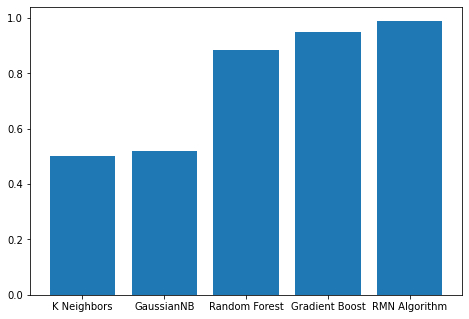

In [35]:
# Visualizations
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [ 'K Neighbors', 'GaussianNB', 'Random Forest','Gradient Boost', 'RMN Algorithm']
accuracy_score = [score_kn,score_nb,score_rf,score_gb,score_es]
ax.bar(langs,accuracy_score)
plt.show()

In [36]:
accuracy_score

[0.5,
 0.5207564575645757,
 0.8842250922509225,
 0.9511070110701108,
 0.9910242968041134]